In [74]:
#import the Libaries
import pandas as pd
import numpy as np
import re as re #Reges(Regular Expression)
import matplotlib.pyplot as plt

In [75]:
dataset=pd.read_csv("Restaurant_Reviews.tsv",delimiter="\t")

In [76]:
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


# Text Preprocressing Or Text Mining

In [5]:
dataset["Review"]

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [6]:
#Preprocressing the First Review

In [7]:
review = dataset["Review"][0]

In [16]:
review

'wow    loved this place '

In [17]:
#sub is the substitite which subtituites the value.
review=re.sub("[^a-zA-Z]"," ",review)

In [18]:
review

'wow    loved this place '

In [19]:
review=review.lower()

In [20]:
review

'wow    loved this place '

In [21]:
#the words which will not effect the end goal is called stop words example:- a,is,this,that etc.

In [22]:
# to rmove the stop words we have a libary called NLTK Natural Lang Tool Kit. INLTK libary is used for indian Languages.

In [23]:
import nltk

In [24]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Krishna
[nltk_data]     Chaitanya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords

In [139]:
stp_list=["not","couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [26]:
# List of Stop Words
# lang should be given in argument
sw=stopwords.words("english")

In [143]:
new_sw=[]

In [151]:
for word in sw:
    if word not in stp_list:
        new_sw.append(word)

In [152]:
#Converting the review into Tokenization

In [153]:
review=review.split()

In [154]:
review

['wast',
 'enough',
 'life',
 'pour',
 'salt',
 'wound',
 'draw',
 'time',
 'took',
 'bring',
 'check']

In [155]:
data=[]

In [156]:
#Stemming normalizing the text into one tense.  or converting the word in to its root form 

In [157]:
from nltk.stem.porter import PorterStemmer

In [158]:
ps=PorterStemmer()

In [159]:
ps.stem("loved")

'love'

In [160]:
for word in review:
    if(word not in sw):
        data.append(ps.stem(word))

In [161]:
data

['wast',
 'enough',
 'life',
 'pour',
 'salt',
 'wound',
 'draw',
 'time',
 'took',
 'bring',
 'check']

In [162]:
review=" ".join(data)

In [163]:
review

'wast enough life pour salt wound draw time took bring check'

In [164]:
dataset.shape[0]

1000

In [258]:
from nltk.stem import WordNetLemmatizer

In [259]:
wl=WordNetLemmatizer()

In [260]:
corpus=[]

In [269]:
for i in range(dataset.shape[0]):
    review = dataset["Review"][i]
    review=re.sub("[^a-zA-Z]"," ",review,)
    review=review.lower()
    review=review.split()
    data=[]
    for word in review:
        if(word not in new_sw):
            data.append(wl.lemmatize(word,pos='v'))
    review=" ".join(data)
    corpus.append(review)

In [270]:
corpus

['wow love place',
 'crust not good',
 'not tasty texture nasty',
 'stop late may bank holiday rick steve recommendation love',
 'selection menu great price',
 'get angry want damn pho',
 'honeslty didn taste fresh',
 'potatoes like rubber could tell make ahead time keep warmer',
 'fry great',
 'great touch',
 'service prompt',
 'would not go back',
 'cashier care ever say still end wayyy overprice',
 'try cape cod ravoli chicken cranberry mmmm',
 'disgust pretty sure human hair',
 'shock sign indicate cash',
 'highly recommend',
 'waitress little slow service',
 'place not worth time let alone vegas',
 'not like',
 'burrittos blah',
 'food amaze',
 'service also cute',
 'could care less interior beautiful',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never bring salad ask',
 'hole wall great mexican street tacos friendly staff',
 'take hour get food table restaurant food luke warm sever run around like totally overwhelm',
 'worst salmon sashimi',
 'also combos like burger 

In [271]:
type(corpus)

list

In [272]:
text_data=" ".join(corpus)

In [273]:
text_data

'wow love place crust not good not tasty texture nasty stop late may bank holiday rick steve recommendation love selection menu great price get angry want damn pho honeslty didn taste fresh potatoes like rubber could tell make ahead time keep warmer fry great great touch service prompt would not go back cashier care ever say still end wayyy overprice try cape cod ravoli chicken cranberry mmmm disgust pretty sure human hair shock sign indicate cash highly recommend waitress little slow service place not worth time let alone vegas not like burrittos blah food amaze service also cute could care less interior beautiful perform right red velvet cake ohhh stuff good never bring salad ask hole wall great mexican street tacos friendly staff take hour get food table restaurant food luke warm sever run around like totally overwhelm worst salmon sashimi also combos like burger fry beer decent deal like final blow find place accident could not happier seem like good quick place grab bite familiar 

In [274]:
from wordcloud import WordCloud

In [275]:
wc=WordCloud()

In [276]:
text_wc=wc.generate(text_data)

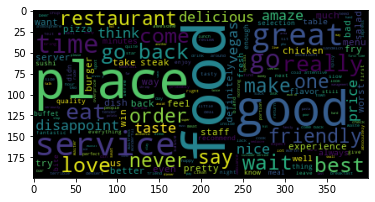

In [277]:
plt.imshow(text_wc)

In [278]:
#Text Representation and Futer Engg
# Vectorization


In [333]:
#Bag of Words(BOW) or Count Vectorization

In [280]:
from sklearn.feature_extraction.text import CountVectorizer

In [281]:
cv=CountVectorizer()

In [282]:
x=cv.fit_transform(corpus).toarray()

In [283]:
# The Martix which has large no. of Zero's is called Spare Matrix

In [284]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [285]:
x.shape # 1000 is the no.of Row, and 1565 is unique coloumsn 

(1000, 1654)

In [286]:
cv.get_feature_names()

['absolute',
 'absolutely',
 'absolutley',
 'accident',
 'accommodations',
 'accomodate',
 'accordingly',
 'accountant',
 'ache',
 'acknowledge',
 'across',
 'actual',
 'actually',
 'add',
 'affordable',
 'afternoon',
 'ago',
 'ahead',
 'airline',
 'airport',
 'ala',
 'albondigas',
 'allergy',
 'almonds',
 'almost',
 'alone',
 'also',
 'although',
 'always',
 'amaze',
 'ambiance',
 'ambience',
 'amount',
 'ample',
 'andddd',
 'angry',
 'annoy',
 'another',
 'anticipate',
 'anymore',
 'anyone',
 'anything',
 'anytime',
 'anyway',
 'anyways',
 'apart',
 'apologize',
 'apology',
 'app',
 'appal',
 'apparently',
 'appeal',
 'appetite',
 'appetizer',
 'appetizers',
 'apple',
 'approval',
 'area',
 'arepas',
 'aria',
 'around',
 'array',
 'arrive',
 'article',
 'ask',
 'assure',
 'atmosphere',
 'atrocious',
 'attach',
 'attack',
 'attention',
 'attentive',
 'attitudes',
 'auju',
 'authentic',
 'average',
 'avocado',
 'avoid',
 'away',
 'awesome',
 'awful',
 'awkward',
 'awkwardly',
 'ayce',


In [287]:
pd.DataFrame(x,columns=cv.get_feature_names())

,absolute,absolutely,absolutley,accident,accommodations,accomodate,accordingly,accountant,ache,acknowledge,...,years,yellow,yellowtail,yelpers,yet,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [337]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [339]:
tfidf=TfidfVectorizer()

In [342]:
x_tfidf=tfidf.fit_transform(corpus).toarray()

In [345]:
x_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [347]:
tfidf.get_feature_names()

['absolute',
 'absolutely',
 'absolutley',
 'accident',
 'accommodations',
 'accomodate',
 'accordingly',
 'accountant',
 'ache',
 'acknowledge',
 'across',
 'actual',
 'actually',
 'add',
 'affordable',
 'afternoon',
 'ago',
 'ahead',
 'airline',
 'airport',
 'ala',
 'albondigas',
 'allergy',
 'almonds',
 'almost',
 'alone',
 'also',
 'although',
 'always',
 'amaze',
 'ambiance',
 'ambience',
 'amount',
 'ample',
 'andddd',
 'angry',
 'annoy',
 'another',
 'anticipate',
 'anymore',
 'anyone',
 'anything',
 'anytime',
 'anyway',
 'anyways',
 'apart',
 'apologize',
 'apology',
 'app',
 'appal',
 'apparently',
 'appeal',
 'appetite',
 'appetizer',
 'appetizers',
 'apple',
 'approval',
 'area',
 'arepas',
 'aria',
 'around',
 'array',
 'arrive',
 'article',
 'ask',
 'assure',
 'atmosphere',
 'atrocious',
 'attach',
 'attack',
 'attention',
 'attentive',
 'attitudes',
 'auju',
 'authentic',
 'average',
 'avocado',
 'avoid',
 'away',
 'awesome',
 'awful',
 'awkward',
 'awkwardly',
 'ayce',


In [348]:
pd.DataFrame(x_tfidf,columns=tfidf.get_feature_names())

,absolute,absolutely,absolutley,accident,accommodations,accomodate,accordingly,accountant,ache,acknowledge,...,years,yellow,yellowtail,yelpers,yet,yucky,yukon,yum,yummy,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [349]:
y=dataset["Liked"].values

In [350]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [351]:
from sklearn.model_selection import train_test_split

In [352]:
x_train,x_test,y_train,y_test=train_test_split(x_tfidf,y,test_size=0.2)

# Building the Neural Network Model.

In [353]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [354]:
from keras.layers import Dropout

In [355]:
model=Sequential()


In [401]:
# add input layer
# kernel_initializer--strategy to initialize the weight
# activation functon you want to apply
# units --number of neurons in next layer or number of output from each  nwuron from current layer
model.add(Dense(input_dim=x_train.shape[1],kernel_initializer='random_uniform',activation='relu',units=150))

# add hidden layer
model.add(Dense(kernel_initializer='random_uniform',activation='relu',units=150))


# add output layer

model.add(Dense(kernel_initializer='random_uniform',activation='sigmoid',units=1))

# compile the model

#define the strategy while loading the model
#loss-error calculating strategy
#optimizer=weights updating strategy
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 50)                82750     
_________________________________________________________________
dense_29 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)                0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 50)                0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 51        
_________________________________________________________________
dense_31 (Dense)             (None, 50)               

In [402]:
model.fit(x_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
800/800 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4950
Epoch 2/10
800/800 [==============================] - 0s 158us/step - loss: 0.6932 - accuracy: 0.5025
Epoch 3/10
800/800 [==============================] - 0s 146us/step - loss: 0.6932 - accuracy: 0.5025
Epoch 4/10
800/800 [==============================] - 0s 152us/step - loss: 0.6931 - accuracy: 0.5025
Epoch 5/10
800/800 [==============================] - 0s 152us/step - loss: 0.6932 - accuracy: 0.5025
Epoch 6/10
800/800 [==============================] - 0s 140us/step - loss: 0.6931 - accuracy: 0.5025
Epoch 7/10
800/800 [==============================] - 0s 145us/step - loss: 0.6932 - accuracy: 0.5025
Epoch 8/10
800/800 [==============================] - 0s 143us/step - loss: 0.6932 - accuracy: 0.5025
Epoch 9/10
800/800 [==============================] - 0s 140us/step - loss: 0.6932 - accuracy: 0.5025
Epoch 10/10
800/800 [==============================] - 0s 138us/step - loss: 0.6931 

In [403]:
#Prediction

In [404]:
y_pred=model.predict_classes(x_test)

In [384]:
y_pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [385]:
from sklearn.metrics import accuracy_score

In [386]:
accuracy_score(y_test,y_pred)

0.49

# real time prediction

In [368]:
Reviews="food is  good..........."

In [369]:
Reviews=cv.transform([Reviews]).toarray()

In [370]:
Reviews.shape

(1, 1654)

In [371]:
real_pred=model.predict_classes(Reviews)

In [372]:
cv.inverse_transform(real_pred)

[array(['absolute'], dtype='<U17')]

In [373]:
real_pred

array([[1]])

In [308]:
model.save("model_sentiment.h5")

In [309]:
import joblib

In [310]:
joblib.dump(cv,"cv_sentiment.pkl")

['cv_sentiment.pkl']

In [334]:
# TF-IDF(Term Ferquency-Inverse Document Ferquecy)
# It will be working with the principle of  Information Theory.
# in the information theroy uncommon words given more pirority and the common words given the less prioprity.